## HW5 Task 3.2

In [0]:
import matplotlib.pyplot as plt
import cv2
import glob
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,img_to_array
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,Activation,BatchNormalization,MaxPooling2D,Flatten,Dense,Dropout
from random import sample
from imblearn.under_sampling import RandomUnderSampler
import os

###Load Data

In [0]:
img_0 = [cv2.resize(cv2.imread(file), (50,50), interpolation=cv2.INTER_CUBIC) for file in glob.glob("/content/*/0/*.png")]

In [0]:
img_1 = [cv2.resize(cv2.imread(file), (50,50), interpolation=cv2.INTER_CUBIC) for file in glob.glob("/content/*/1/*.png")]

##### The class is imbalanced, so have subsampled the class 0 and class 1 images to be equal in number.

In [0]:
img_0 = list(np.array(img_0)[np.random.randint(0,np.array(img_0).shape[0],2954),:,:,:])
img_1 = list(np.array(img_1)[np.random.randint(0,np.array(img_1).shape[0],2954),:,:,:])

#### Create 2 new folders to save images  
- This is done so that when using class_mode='categorical' in .flow_from_directory() we can correctly get the images with 2 class labels.

In [0]:
os.makedirs('all_images/img0/')
os.makedirs('all_images/img1/')

In [0]:
for ind,i in enumerate(img_0):
  cv2.imwrite('/content/all_images/img0/'+str(ind)+'.png', i)

In [0]:

for ind,i in enumerate(img_1):
  cv2.imwrite('/content/all_images/img1/'+str(ind)+'.png', i)


#### Data Augmentation using ImageDataGenerator()

In [0]:
batch_size = 128

In [0]:
train_datagen = ImageDataGenerator(rotation_range=40,rescale=1./255,zoom_range=0.2,vertical_flip=True,validation_split=0.2)

##### Creating a train and validation set 

In [17]:
train_generator = train_datagen.flow_from_directory(
        '/content/all_images',  # this is the target directory
        target_size=(50, 50),
        batch_size=batch_size,
        class_mode='categorical',subset="training")

Found 4728 images belonging to 2 classes.


In [18]:
validation_generator = train_datagen.flow_from_directory(
        '/content/all_images',  # this is the target directory
        target_size=(50, 50),
        batch_size=batch_size,
        class_mode='categorical',subset="validation")

Found 1180 images belonging to 2 classes.


#### CNN Model

In [0]:
cnn_small_bn = Sequential()
cnn_small_bn.add(Conv2D(8, kernel_size=(3, 3),input_shape=(50,50,3)))
cnn_small_bn.add(Activation("relu"))
cnn_small_bn.add(BatchNormalization())
cnn_small_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small_bn.add(Conv2D(8, (3, 3)))
cnn_small_bn.add(Activation("relu"))
cnn_small_bn.add(BatchNormalization())
cnn_small_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small_bn.add(Dropout(0.5))
cnn_small_bn.add(Conv2D(8, (3, 3)))
cnn_small_bn.add(Activation("relu"))
cnn_small_bn.add(BatchNormalization())
cnn_small_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small_bn.add(Dropout(0.5))
cnn_small_bn.add(Flatten())
cnn_small_bn.add(Dense(2, activation='softmax'))

In [0]:
cnn_small_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [33]:
fitted = cnn_small_bn.fit_generator(train_generator, steps_per_epoch=250, epochs=20,validation_data=validation_generator,validation_steps=80)


Epoch 1/20
250/250 [==============================] - 42s 167ms/step - loss: 0.7371 - acc: 0.7196 - val_loss: 0.4677 - val_acc: 0.8114
Epoch 2/20
250/250 [==============================] - 39s 157ms/step - loss: 0.4673 - acc: 0.7960 - val_loss: 0.7556 - val_acc: 0.5617
Epoch 3/20
250/250 [==============================] - 41s 164ms/step - loss: 0.4407 - acc: 0.8081 - val_loss: 0.4670 - val_acc: 0.7904
Epoch 4/20
250/250 [==============================] - 39s 154ms/step - loss: 0.4283 - acc: 0.8141 - val_loss: 0.4858 - val_acc: 0.7650
Epoch 5/20
250/250 [==============================] - 40s 160ms/step - loss: 0.4250 - acc: 0.8165 - val_loss: 0.4817 - val_acc: 0.7962
Epoch 6/20
250/250 [==============================] - 39s 157ms/step - loss: 0.4256 - acc: 0.8164 - val_loss: 0.4585 - val_acc: 0.8081
Epoch 7/20
250/250 [==============================] - 40s 160ms/step - loss: 0.4211 - acc: 0.8179 - val_loss: 0.4126 - val_acc: 0.8252
Epoch 8/20
250/250 [==============================] - 3

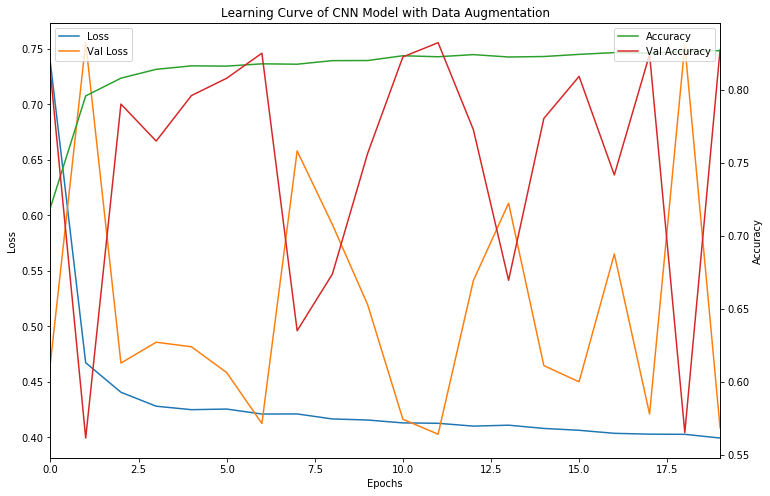

In [34]:
df = pd.DataFrame(fitted.history)
plt.figure(figsize=(12,8))
plt.xlabel('Epochs')
plt.title('Learning Curve of CNN Model with Data Augmentation')

ax1 = df['loss'].plot( label='Loss')
ax1 = df['val_loss'].plot( label='Val Loss')
ax2 = df['acc'].plot(secondary_y=True, label='Accuracy')
ax2 = df['val_acc'].plot(secondary_y=True, label='Val Accuracy')

ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
ax1.legend(loc=2)
ax2.legend(loc=1)

plt.show()

### The CNN model has the same architecture as the one in Task 3.1. We can see that using the augmented images in training the model gives us better accuracy. This is because the model is trained on different instances of the same image, thus the model trains better with the same model architecture.

- Training score and validation score : 0.832